Results found in file a-0.png


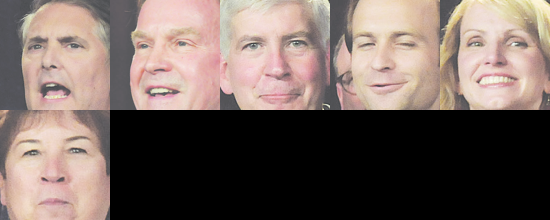

Results found in file a-1.png


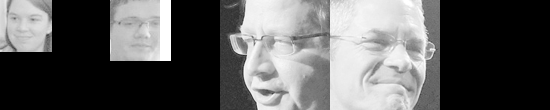

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png
But there were no faces in that file!
Results found in file a-2.png
But there were no faces in that file!
Results found in file a-3.png
But there were no faces in that file!
Results found in file a-8.png
But there were no faces in that file!


In [3]:
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import zipfile
import pytesseract as tess


face_cascade=cv.CascadeClassifier("C:/Users/Aniruddha/Desktop/Python/Project/readonly/haarcascade_frontalface_default.xml")

images={}
name_list=[]

new_zip="C:/Users/Aniruddha/Desktop/Python/Project/readonly/images.zip"
tess.pytesseract.tesseract_cmd=r'C:\Users\Aniruddha\AppData\Local\Tesseract-OCR\tesseract.exe'

zf=zipfile.ZipFile(new_zip)
for each in zf.infolist():
    images[each.filename]=[Image.open(zf.open(each.filename))]
    name_list.append(each.filename)
#print(images)

for name in name_list:
    img=images[name][0]
    images[name].append(pytesseract.image_to_string(img).replace('-\n',''))
    
    if 'Mark' in images[name][1]:
        print('Results found in file',name)
        try:
            faces=face_cascade.detectMultiScale(np.array(img),1.35,4)
            
            images[name].append(faces)
            
            faces_in_each=[]
            
            for (x,y,w,h) in images[name][2]:
                faces_in_each.append(img.crop((x,y,x+w,y+h)))
            
            contact_sheet=Image.new(img.mode,(550,110*int(np.ceil(len(faces_in_each)/5))))
            a=0
            b=0
            for face in faces_in_each:
                face.thumbnail((110,110))
                contact_sheet.paste(face,(a,b))
                if a+110 == contact_sheet.width:
                    a=0
                    b=b+110
                else:
                    a=a+110
            display(contact_sheet)
                    
                
        except:
            print('But there were no faces in that file!')
                